In [39]:
%%capture
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path

code_dir = Path().resolve() / "code"
data_dir = Path().resolve() / "data"
sys.path.insert(0, str(code_dir))

# Анализ данных

## I. Анализ рынка

### 1) Введение

Анализ рынка представлен с позиции оценки объема рынка
К анализу объема рынка применено разделение на показатели **PAM**, **TAM**, **SAM**, **SOM**

**PAM** - Potential Available Market
> потенциальный объем рынка, включающий всех потенциальных клиентов в мире без учёта ограничений

**TAM** - Total Addressable Market
> общий целевой рынок, охватывающий всех потенциальных потребителей продукта, на которых проект может теоретически воздействовать

**SAM** - Serviceable Available Market
> доступный объём рынка, который является частью TAM и на который можно реально воздействовать с учётом географии, канала продаж и других ограничений

**SOM** - Serviceable & Obtainable Market
> реально достижимый объём рынка, который отражает ту долю рынка, которую проект может занять в ближайшем будущем, учитывая маркетинговые бюджеты, ресурсы и конкурентную среду

### 2) Анализ PAM

Проект посвящен компьютерной игре [Warframe](https://www.warframe.com/ru), и разрабатываемое решение будет полезно исключительно для пользователей игры.

Потому в качестве доли рынка для PAM будут рассмотрены активные пользователи игры.

Источник данных об игровой активности - [SteamDB](https://steamdb.info/)

Для этого и всех последующих графиков использованы англоязычные подписи, дабы избежать проблем с кириллическими шрифтами

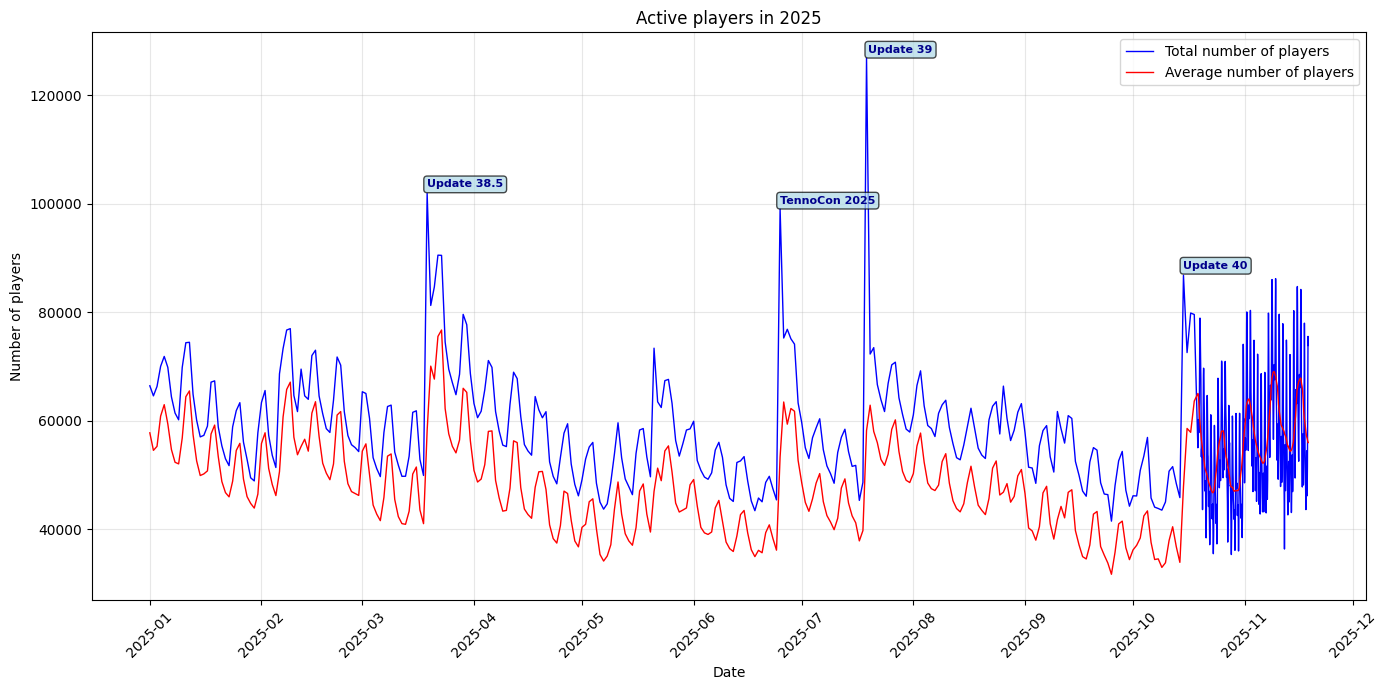

In [40]:
import steamdb_graph as graph
graph.make_chart(data_dir)

Данные за 2025 год иллюстрируют актуальный потенциальный объём рынка.

Можно заметить, что даже за годовой период наблюдаются резкие приросты и периоды спада. Резкие пики активности можно объяснить выходом крупных обновлений или наступлением других значимых для сообщества событий. На графике подписаны такие события за 2025 год. После, как правило, происходит постепенный спад, после освоения нового игрового контента, в ожидании введения нового.

Помимо этого видны постоянные колебания активности на более мелком масштабе - несколько раз в течение месяца. Это отражает тот факт, что пик обычной активности приходится на выходные дни.

Изменение вида графика с середины октября по середину ноября объясняются тем, что сервис предоставляет более детальные данные за последний месяц, чем за остальное время.

### 3) Анализ TAM

Наш продукт - конфигуратор для игрового снаряжения, а потому наша целевая доля PAM - это те игроки, которые хотят подобрать себе конфигурацию чего-либо, т.е. "билд".

Данные об этой доле рынка отражены через данные об активности на сайтах самых популярных конфигураторов игрового снаряжения в Warframe - [Overframe](https://overframe.gg/) и [Warframe Builder](https://warframe-builder.com/)

Источник данных о трафике сайтов - [Similarweb](https://pro.similarweb.com/)

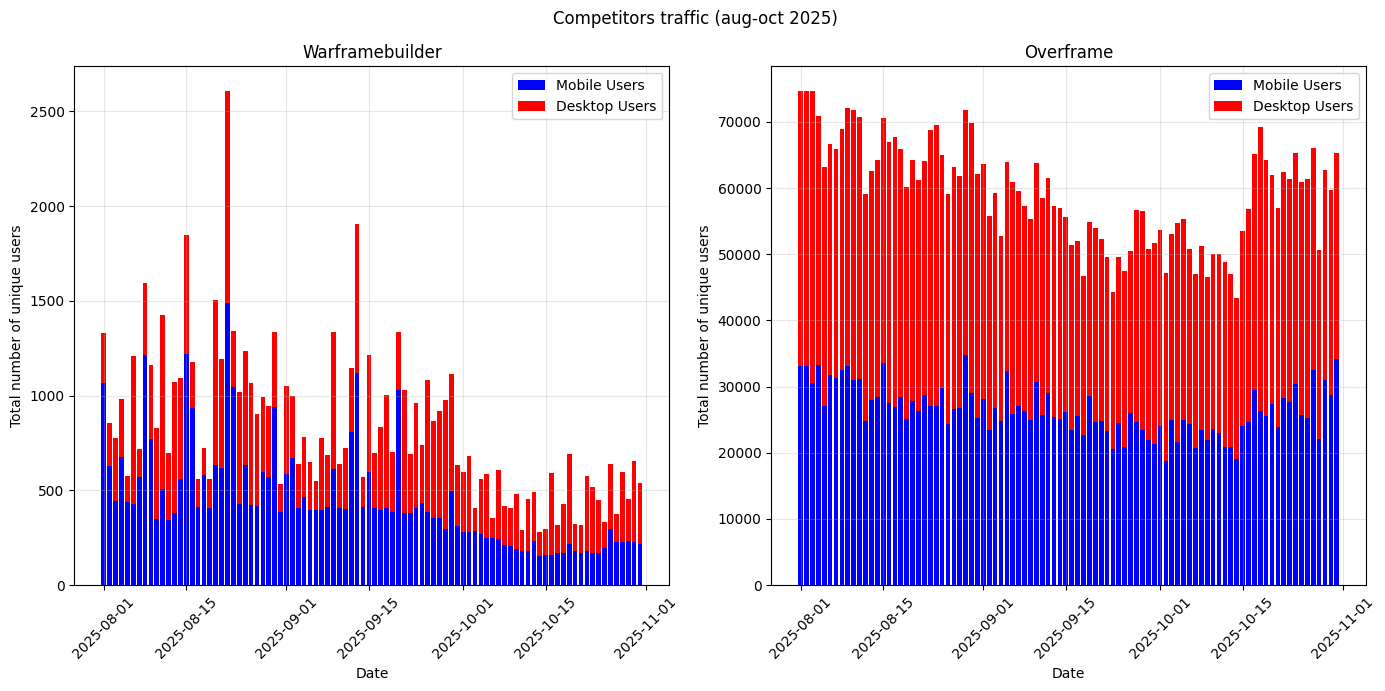

In [41]:
import competitors_traffic_graph as graph
graph.make_chart(data_dir)

Выше представлены двухрядные сложенные столбчатые графики трафика сайтов популярнейших проектов-конкурентов за август-октябрь 2025 года.

Как видно, достаточно равномерно распределяется трафик между пользователями, посещающими сайты с мобильных устройств, и с десктопных.

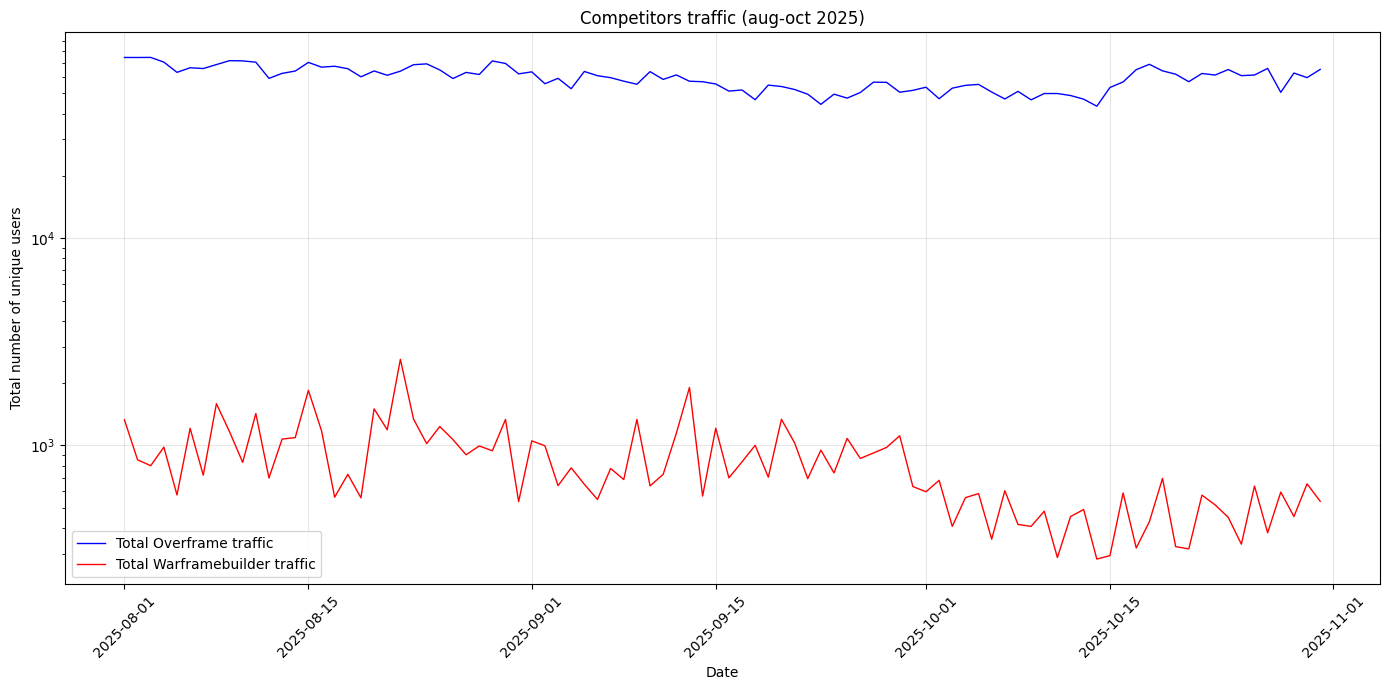

In [42]:
import competitors_graph as graph
graph.make_chart(data_dir)

Сравнение общего трафика двух популярнейших конкурентов показывает, что доминирующее положение среди них занимает Overframe, причём с большим отрывом.

### 4) Анализ SAM

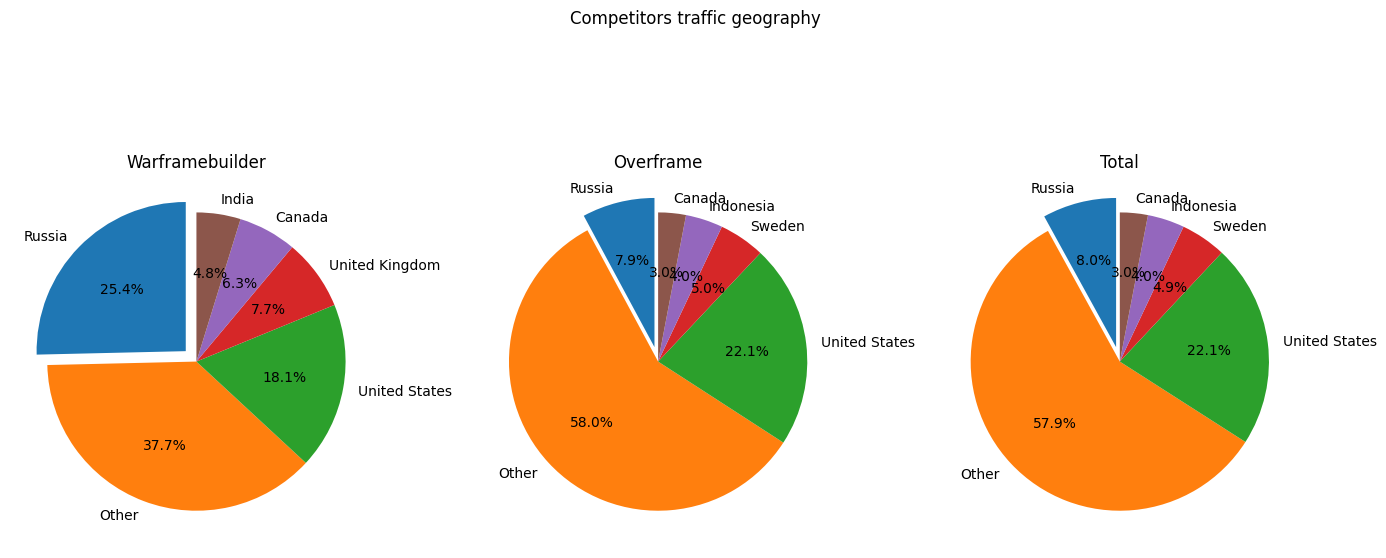

In [43]:
import geography_graph as graph
graph.make_chart(data_dir)

Согласно представленным круговым диаграммам, доступный объём рынка от всего TAM составляет 8.0% - это российская доля общего целевого рынка.

Однако, если применить решение не только на российском рынке (предоставить локализацию и доступ для зарубежных пользователей), то можно будет добиться гораздо большего. Так, по итоговому графику можно заметить, что в TAM 22.1% составляют американские пользователи и 3% канадские, это означает, что введение только лишь английской локализации и доступа для зарубежных пользователей уже позволит нарастить доступный объём рынка в несколько раз.

### 5) Анализ SOM

Поскольку проект учебный, маркетинговые затраты, бюджет на разработку и поддержку продукта и т.д. не учитываются. Потому говорить о доле SOM нецелесообразно.

Целесообразно показать, чем продукт будет отличаться от конкурентов. Этот аспект будет рассмотрен в следующей части анализа данных

### 6) Итоги анализа рынка


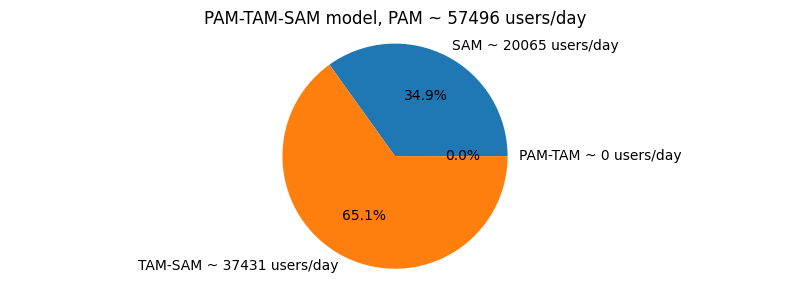

In [44]:
import market_graph as graph
graph.make_chart(data_dir)

График PAM-TAM-SAM модели показывает удивительный результат.

Во-первых, как видно, доля TAM не уступает потенциальному объёму рынка PAM, это значит. Это говорит нам, что общий целевой рынок не накладывает огранчений на потенциальный объём рынка, то есть, трафик сервисов-конфигураторов, который мы ранее брали для анализа TAM, сопоставим с общей игровой активностью.

Во-вторых, если принять во внимание наше более раннее замечание о том, как введение всего двух языков (русский, английский) на сайте и доступа в соответсвующих странах, может существенно ослабить географические ограничения доступного объёма рынка, то по графику видно, что в таком случае SAM составляет примерно треть от TAM и на 2025 год превышает в среднем 20 тысяч уникальных пользователей ежедневно.

Таким образом, остаётся лишь понять, как занять наибольшую долю в SAM при прогнозировании реально достижимого объёма рынка. Именно это нам покажет сравнительный анализ с конкурентами.

## II. Сравнение с конкурентами. Доказательство актуальности

### 1) Предоставляемые возможности (фичи)

Первым делом стоит рассмотреть, какие возможности предоставляют продукты конкурентов, и какие возможности будут предоставлены нашим продуктом.

Ниже представлена таблица основного функционала. Сделаем краткое пояснение.

**Equipment types**
> типы снаряжения, которые можно сконфигурировать на сайте (оружие, варфреймы, компаньоны)

**Current data**
> актуальность используемых данных, их соответствие текущему внутриигровому контенту

**Public posting of builds**
> возможность выкладывать на сайте свои конфигурации, чтобы другие пользователи могли их просматривать и оценивать

**Efficiency calculation**
> автоматические подсчёты реальных показателей, которые будет иметь сконфигурированное снаряжение в бою

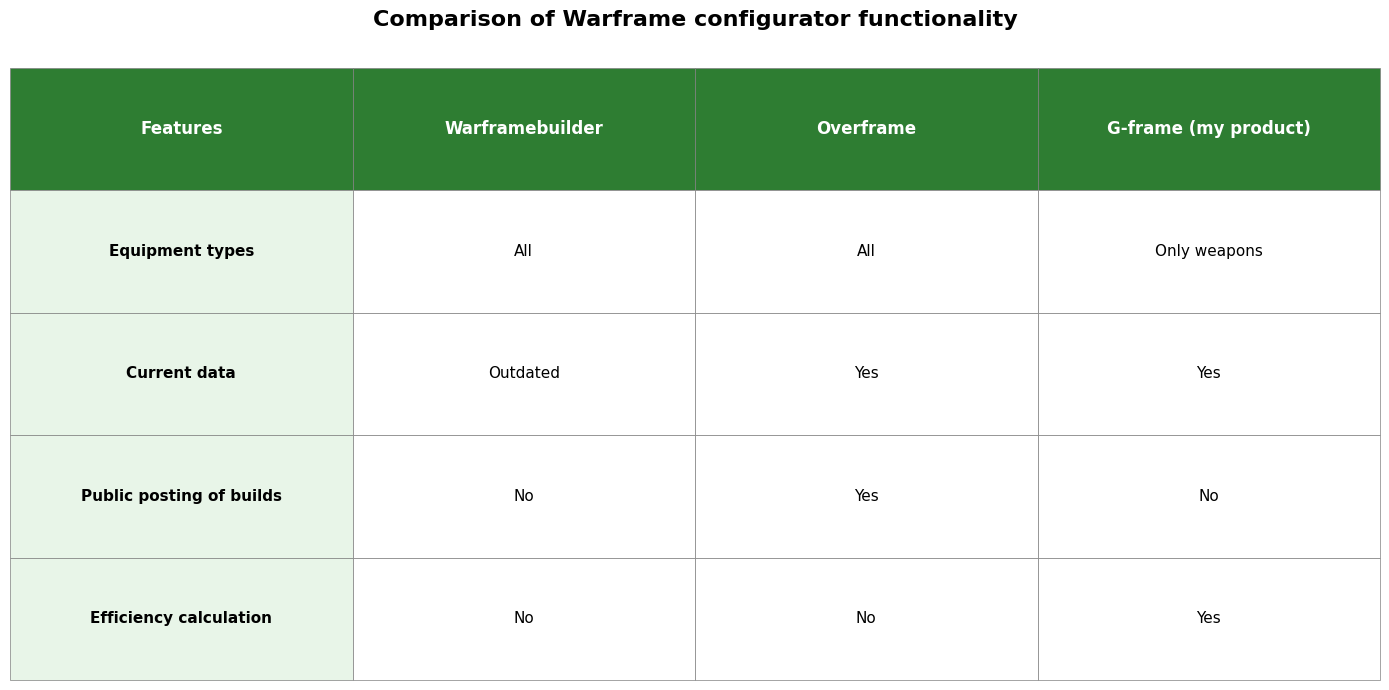

In [45]:
import features_table as table
table.make_chart(data_dir)

Видно, что наибольшее количество возможностей среди конкурентов предоставляет Overframe, однако, он не предоставляет никаких сведений относительно эффективности собранной конфигурации, не производит соответствующих вычислений, которые могли бы показать реальные показатели в бою. Равно как и Warframebuilder.

Именно в этом и будет ключевое отличие нашего продукта, по сути, это позволяет занять собственную нишу, поскольку не существует аналогов подобного функционала у конкурентов.

Однако, теперь необходимо доказать, что подобный функционал нужен, что таким образом можно действительно получить снаряжение значительно более высокой эффективности.

### 2) Экспериментальная проверка эффективности конфигураций

Рассмотрим экспериментальные данные, собранные для четырёх различных конфигураций:
1. Пустой билд (никаких дополнительных модификаций)
2. Автоматически собранный в игре билд (встроенная внутриигровая функция)
3. Самый популярный по реакциям [билд](https://overframe.gg/build/511115/fulmin-prime/the-fulminator-semi-auto-viral-electric-variants-updated-2025/) с Overframe
4. Мой собственный билд

Параметры эксперимента:
1. Снаряжение - [Фульмин Прайм](https://wiki.warframe.com/w/Fulmin_Prime)
2. Режим стрельбы - автоматический
3. Противники - [Пустынный Тяжёлый Пулеметчик](https://wiki.warframe.com/w/Heavy_Gunner#Arid)
4. Уровень противников - 100
5. Стальной путь - отключён
6. Дополнительные бонусы - отключены

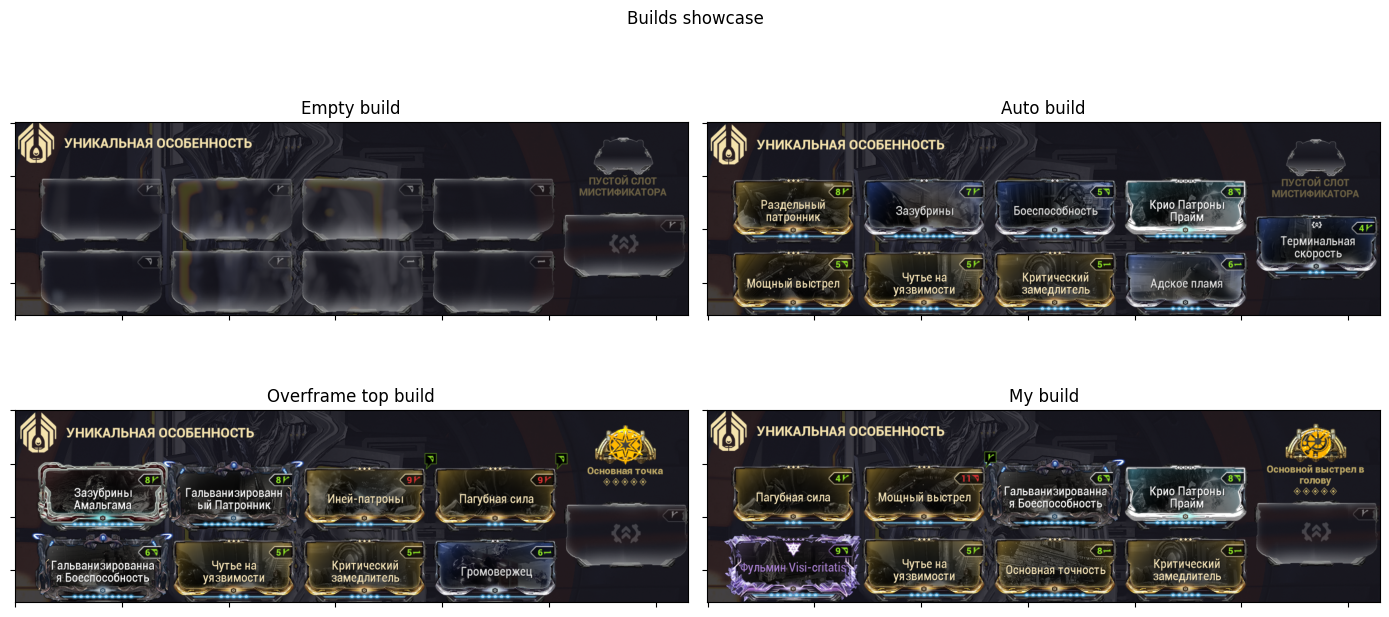

In [46]:
import builds_showcase_img as image
image.make_chart(data_dir)

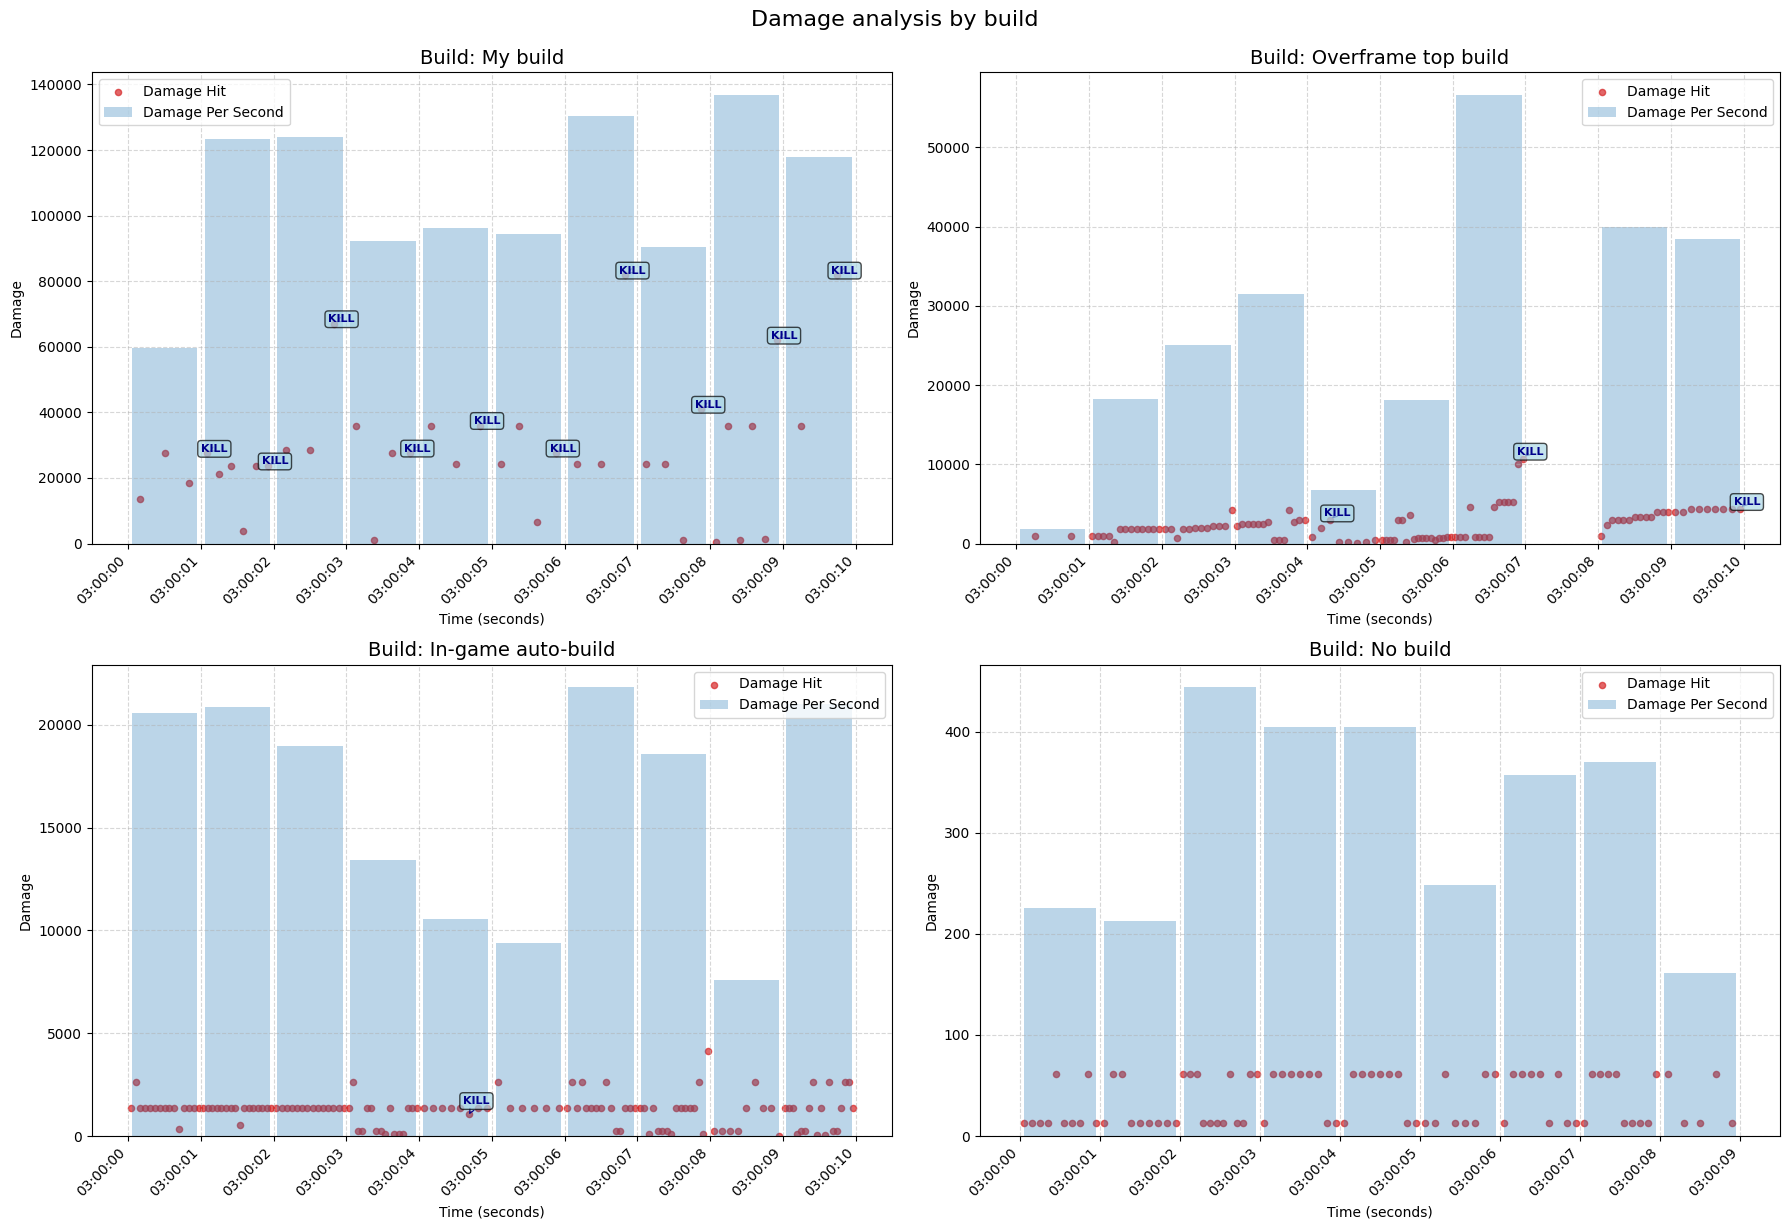

In [47]:
import builds_test_graph as graph
graph.make_chart(data_dir)

Выше представлены графики, отражающие результаты эксперимента для каждого из рассмотренных билдов.

Столбцами обозначен урон, нанесённый за секунду.

Точечно отображено каждое нанесение урона. Те попадания, которые привели к ликвидации цели, помечены подписью KILL.

### 3) Сравнение эффективности конфигураций

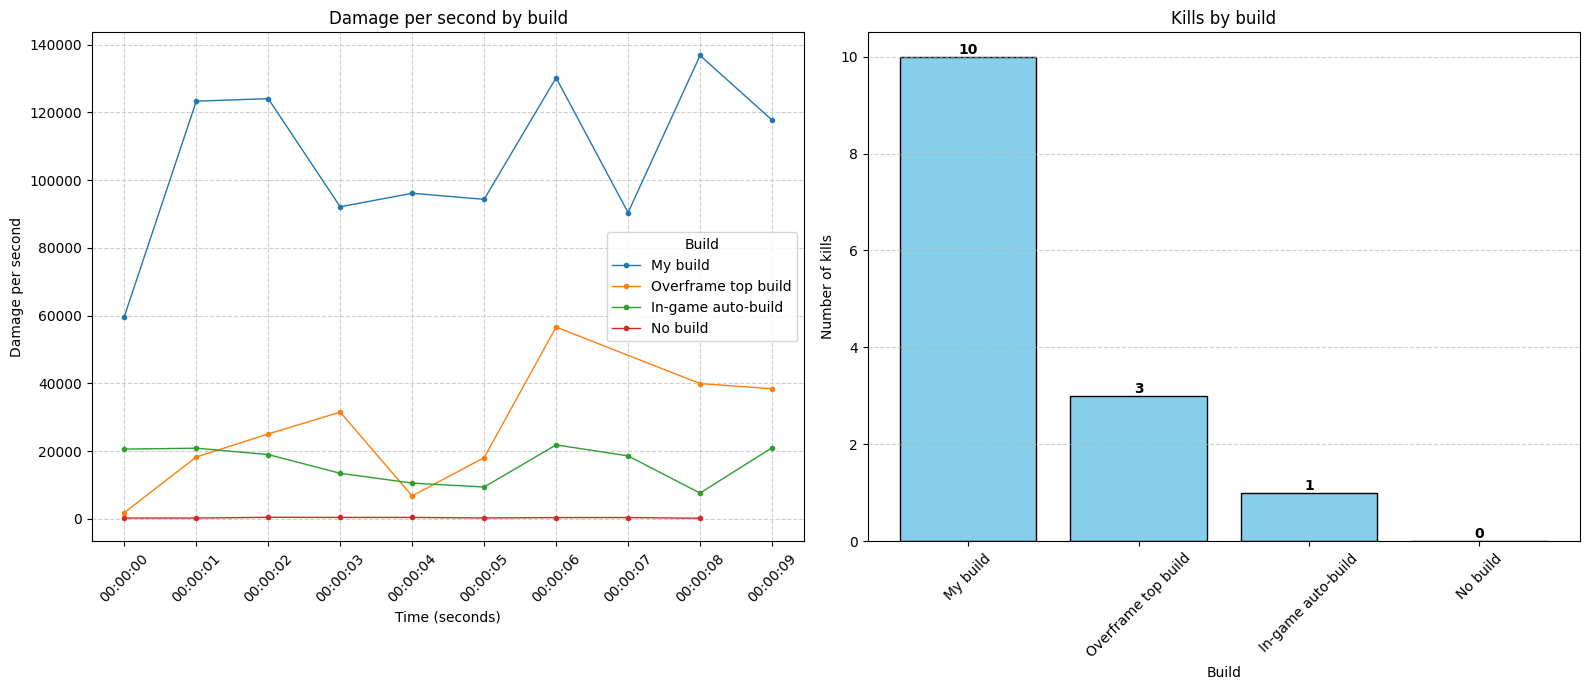

In [48]:
import builds_compare_graph as graph
graph.make_chart(data_dir)

По предоставленному сравнению конфигураций как по наносимому в секунду урону, так и по поражённым противникам, отчётливо видна значительная разница эффективности разных конфигураций. Подтверждается предположение о том, что популярнейшие конфигурации с Overframe не обязательно высоко эффективны.

## III Подведение итогов
По данным, полученным при анализе рынка, видно, что тема проекта является актуальной, доступный объём рынка достаточно велик и присутствуют перспективы занять его часть.

Данные, выявленные при сравнении с конкурентами, показали, что ключевое преимущество нашего продукта - вычисление эффективности конфигурации, может значительно помочь клиентам. И, поскольку аналогичного функционала нет у конкурентов, реализованный проект может стать конкурентноспособным и занять собственную нишу.